# メモ
画像処理医にはgrabcutという異アルゴリズムがあり、背景透過などができる
watershedは画像の二値化ができ、ノイズ除去ができる。
# このファイル
http://labs.eecs.tottori-u.ac.jp/sd/Member/oyamada/OpenCV/html/py_tutorials/py_objdetect/py_face_detection/py_face_detection.html#face-detection
このページを参考に
↓のコードの考察
1. カスケード分類器をcv2.CascadeClassifier(ファイル名)で用意
2. カスケード分類器.detectMultiScale(画像名, スケールファクター, 最小近傍短係数)
3. スケールファクターは何％づつ画像を縮小するのか指定し、異なるサイズの検知ができるようにするらしい
4. 最小近傍短係数は最低でも指定した回数以上別のスケールでも検知されなければ結果に表示しないといった感じのものかな？

(1082, 1079, 3)


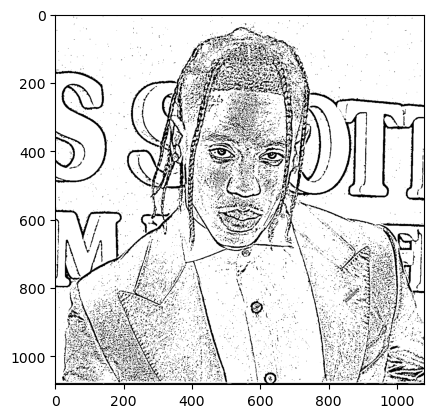

In [11]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
# 勾配を取る→差分を取る
face_cascade = cv2.CascadeClassifier('.datasets/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('.datasets/haarcascade_eye.xml')

img = cv2.imread('.datasets/sample.webp')
print(img.shape)

# opencvはBGRで画像を読み込んでしまい、赤と青が反転してしまうためここでそれを治す
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
# グレースケールにして二値化する
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
#ret,thresh=cv2.threshold(gray,160,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

thresh = cv2.adaptiveThreshold(
    cv2.cvtColor(img, cv2.COLOR_RGB2GRAY),
    255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,# ガウシアンとは正規分布のこと
    cv2.THRESH_BINARY,
    17,# ブロックの大きさ
    4# しきい値のオフセット
)
# plt.imshow(img)
# plt.imshow(gray)
plt.imshow(thresh,cmap='gray')

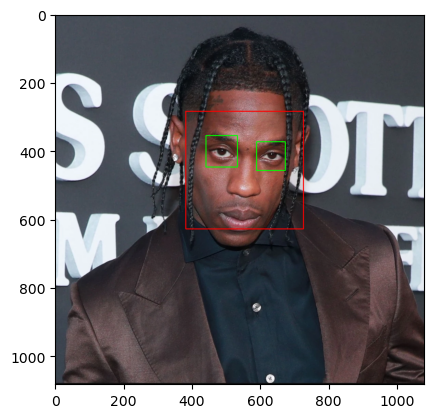

In [12]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)  # 顔を検出するためにカスケード分類器を使用。1.3はスケールファクター、5は最小近傍短係数
for (x,y,w,h) in faces:
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
plt.imshow(img)